In [3]:
from pathlib import Path
from dataset.dataset_interface import DatasetInterface
from matplotlib import pyplot as plt
from utils.visualization_utils import to_rgb
import numpy as np
import cv2


dataset_interface = DatasetInterface(Path("../../resources/images/calibrated"))
rs_rgb, _, zv_rgb, _ = dataset_interface[5]
rs_rgb = zv_rgb
image = to_rgb(rs_rgb)

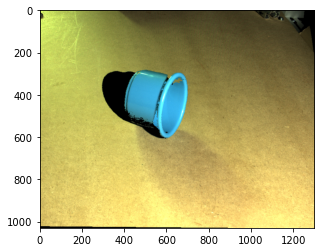

In [92]:
plt.imshow(to_rgb(rs_rgb[100:, 400:1700]))

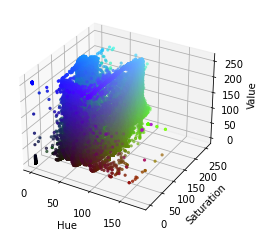

In [53]:
from matplotlib import colors

image = to_rgb(rs_rgb)
image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

pixel_colors = image.reshape((np.shape(image)[0]*np.shape(image)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
h, s, v = cv2.split(image)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

[ 24.91066 135.94478 233.10576]


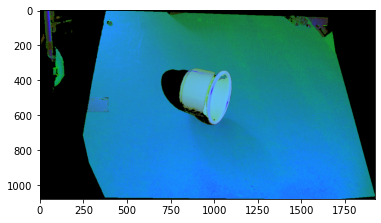

In [94]:
print(np.mean(image[800:1000:, 500:750], axis=(0, 1)))
plt.imshow(image)

0.4540838868844558


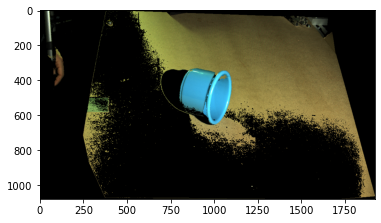

In [85]:
light_brown = (22, 101, 180)
dark_brown = (30, 156, 255)

mean_brown = np.array([25, 135, 233]) / 255

diff = image / 255 - mean_brown[None, None, :]
diff = np.linalg.norm(diff, axis=2)
print(np.mean(diff))
diff = np.expand_dims(diff, axis=2)
masked_image = np.where(np.abs(diff) >= 0.2, to_rgb(rs_rgb), [0, 0, 0])

plt.imshow(masked_image)